In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os

def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")
    
    # Get a list of all entries in the directory
    all_entries = os.listdir(directory_path)
    
    # Filter out only directories
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]
    
    return folders

In [3]:
DIRECTORY= r"/kaggle/input/fer2013/train"
CATAGORIES= []
try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATAGORIES.append(folder)
except ValueError as e:
    print(e)

CATAGORIES

Directories in '/kaggle/input/fer2013/train':


['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

In [4]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)
    
    
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")
            
#         img_arr=cv2.resize(img_arr,(100,100))
        
#         data.append([img_arr,label])

In [5]:
random.shuffle(data)
len(data)

28709

In [6]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)
    
X= np.array(x)
Y=np.array(y)
X=X/255

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0,InceptionResNetV2
from tensorflow.keras import layers, models

In [8]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

img_size = 100
# Define the SGD optimizer with Nesterov momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor
    factor=0.5,           # Factor by which the learning rate will be reduced
    patience=3,           # Number of epochs with no improvement to wait before reducing
    min_lr=1e-6,          # Minimum learning rate
    verbose=1             # Display a message when the learning rate is reduced
)

# Define base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = True  

# Add new layers on top of the base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Pooling the features from the base model
x = layers.Dropout(0.5)(x)  # Dropout to prevent overfitting
x = layers.Dense(512, activation='relu')(x)  # Dense layer
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)  # Dense layer
x = layers.Dropout(0.5)(x)
output = layers.Dense(7, activation='softmax')(x)  # Final output layer with softmax

# Create the full model
model = models.Model(inputs=base_model.input, outputs=output)

# Compile the model with the SGD optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the ReduceLROnPlateau callback
history = model.fit(
    X, Y,
    validation_split=0.25,
    epochs=50,
    callbacks=[reduce_lr]
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


I0000 00:00:1729946636.765536      92 service.cc:145] XLA service 0x7dc794001830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729946636.765591      92 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/673 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.1797 - loss: 2.2705    

I0000 00:00:1729946677.266199      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


673/673 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.3186 - loss: 1.7185 - val_accuracy: 0.4281 - val_loss: 1.4963 - learning_rate: 0.0100
Epoch 2/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.5301 - loss: 1.2466 - val_accuracy: 0.5642 - val_loss: 1.1805 - learning_rate: 0.0100
Epoch 3/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.6020 - loss: 1.0799 - val_accuracy: 0.6123 - val_loss: 1.0636 - learning_rate: 0.0100
Epoch 4/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.6478 - loss: 0.9589 - val_accuracy: 0.5903 - val_loss: 1.0975 - learning_rate: 0.0100
Epoch 5/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.6820 - loss: 0.8773 - val_accuracy: 0.6278 - val_loss: 1.0348 - learning_rate: 0.0100
Epoch 6/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.7191 - loss: 0.7866 - val_accuracy: 0.5794 - val_loss: 1.2188 - learning_rate: 0.0100
Epoch 7/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.7477 - loss: 0.70

In [9]:
model.save('/kaggle/working/eff.keras')

In [10]:
DIRECTORY2= r"/kaggle/input/fer2013/test"
CATAGORIES2= []
try:
    folders = find_Class(DIRECTORY2)
    print(f"Directories in '{DIRECTORY2}':")
    for folder in folders:
        CATAGORIES2.append(folder)
except ValueError as e:
    print(e)

CATAGORIES2

Directories in '/kaggle/input/fer2013/test':


['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

In [11]:
data2=[]

for categories in CATAGORIES2:
    folder=os.path.join(DIRECTORY2,categories)
    label=CATAGORIES2.index(categories)
    
    
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data2.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")

In [12]:
x2=[]
y2=[]


for features,label in data2:
    x2.append(features)
    y2.append(label)
    
X2= np.array(x2)
Y2=np.array(y2)
X2 = X2/255

In [1]:
train_loss, train_accuracy = model.evaluate(X2, Y2, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')

Training Loss: 2.0430
Training Accuracy: 0.6524


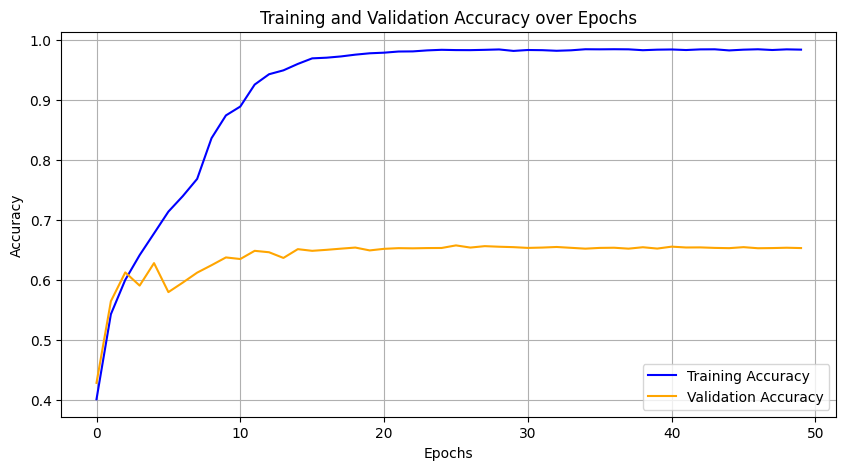

In [14]:
import matplotlib.pyplot as plt


# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [15]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

img_size = 100

# Define the SGD optimizer with Nesterov momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor
    factor=0.5,           # Factor by which the learning rate will be reduced
    patience=3,           # Number of epochs with no improvement to wait before reducing
    min_lr=1e-6,          # Minimum learning rate
    verbose=1             # Display a message when the learning rate is reduced
)

# Load InceptionResNetV2 base model
base_model_inception2 = InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size, img_size, 3))

# Add new layers on top of the base model
x = base_model_inception2.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  # Dropout to prevent overfitting
x = layers.Dense(512, activation='relu')(x)  # Dense layer
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)  # Dense layer
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(7, activation='softmax')(x)

# Create the full model
model_inception2 = models.Model(inputs=base_model_inception2.input, outputs=predictions)

# Compile the model with the SGD optimizer
model_inception2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the ReduceLROnPlateau callback
history_inception2 = model_inception2.fit(
    X, Y,
    validation_split=0.25,
    epochs=50,
    callbacks=[reduce_lr]
)


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 269s 225ms/step - accuracy: 0.2909 - loss: 1.8585 - val_accuracy: 0.4840 - val_loss: 1.3553 - learning_rate: 0.0100
Epoch 2/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.4833 - loss: 1.3506 - val_accuracy: 0.4992 - val_loss: 1.3031 - learning_rate: 0.0100
Epoch 3/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.5468 - loss: 1.2029 - val_accuracy: 0.5443 - val_loss: 1.2427 - learning_rate: 0.0100
Epoch 4/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.5940 - loss: 1.0812 - val_accuracy: 0.5242 - val_loss: 1.2593 - learning_rate: 0.0100
Epoch 5/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 77s 114ms/step - accuracy: 0.6146 - loss: 1.0422 - val_accuracy: 0.1570 - val_loss: 1.9954 - learning_rate: 0.0100
Epoch 6/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4235 - loss: 1.4835
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
673/673 

In [16]:
model_inception2.save('/kaggle/working/inres.keras')

In [17]:

test_loss_inception2, test_accuracy_inception2 = model_inception2.evaluate(X2, Y2, verbose=0)

# Print the results with formatted output
print(f'Test Loss: {test_loss_inception2:.4f}')
print(f'Test Accuracy: {test_accuracy_inception2:.4f}')



Test Loss: 2.5533
Test Accuracy: 0.6169


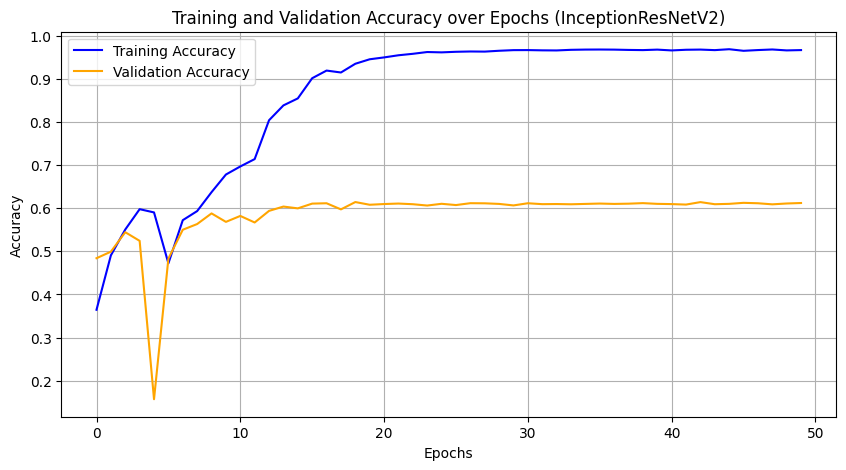

In [18]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy for InceptionResNetV2
plt.figure(figsize=(10, 5))
plt.plot(history_inception2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_inception2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy over Epochs (InceptionResNetV2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()



In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

img_size_resnet = 100

# Define the SGD optimizer with Nesterov momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor
    factor=0.5,           # Factor by which the learning rate will be reduced
    patience=3,           # Number of epochs with no improvement to wait before reducing
    min_lr=1e-6,          # Minimum learning rate
    verbose=1             # Display a message when the learning rate is reduced
)

# Load the ResNet50 model with pre-trained ImageNet weights
base_resnet_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size_resnet, img_size_resnet, 3)
)

# Add custom layers on top of ResNet50
resnet_output = base_resnet_model.output
resnet_output = layers.GlobalAveragePooling2D()(resnet_output)
resnet_output = layers.Dropout(0.5)(resnet_output)
resnet_output = layers.Dense(512, activation='relu')(resnet_output)
resnet_output = layers.Dropout(0.5)(resnet_output)
resnet_output = layers.Dense(512, activation='relu')(resnet_output)
resnet_output = layers.Dropout(0.5)(resnet_output)
resnet_predictions = layers.Dense(7, activation='softmax')(resnet_output)

# Create the complete model
resnet_model_final = models.Model(inputs=base_resnet_model.input, outputs=resnet_predictions)

# Compile the ResNet50 model with the SGD optimizer
resnet_model_final.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the ReduceLROnPlateau callback
history_resnet = resnet_model_final.fit(
    X, Y,
    validation_split=0.25,
    epochs=50,
    callbacks=[reduce_lr]
)




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 117s 109ms/step - accuracy: 0.2779 - loss: 1.8787 - val_accuracy: 0.2537 - val_loss: 1.8431 - learning_rate: 0.0100
Epoch 2/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.4976 - loss: 1.3314 - val_accuracy: 0.5267 - val_loss: 1.3035 - learning_rate: 0.0100
Epoch 3/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.5604 - loss: 1.1680 - val_accuracy: 0.5059 - val_loss: 1.3276 - learning_rate: 0.0100
Epoch 4/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.6114 - loss: 1.0655 - val_accuracy: 0.4117 - val_loss: 1.5582 - learning_rate: 0.0100
Epoch 5/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.6542 - loss: 0.9599 - val_accuracy: 0.5655 - val_loss: 1.1893 - learning_rate: 0.0100
Epoch 6/50
673/673 ━━━━━━━━━━━━━━━━━━━━ 44s 65ms/step - accuracy: 0.6930 - loss: 0.8520 - val_accuracy: 0.4932 - val_loss: 1.4451 - learning_rate: 0.0100
Epoch 7/50
673/673 ━━━━

In [20]:
resnet_model_final.save('/kaggle/working/res50.keras')

In [21]:

test_loss_resnet, test_accuracy_resnet = resnet_model_final.evaluate(X2, Y2, verbose=0)

# Print the results with formatted output
print(f'Test Loss: {test_loss_resnet:.4f}')
print(f'Test Accuracy: {test_accuracy_resnet:.4f}')


Test Loss: 3.0166
Test Accuracy: 0.6304


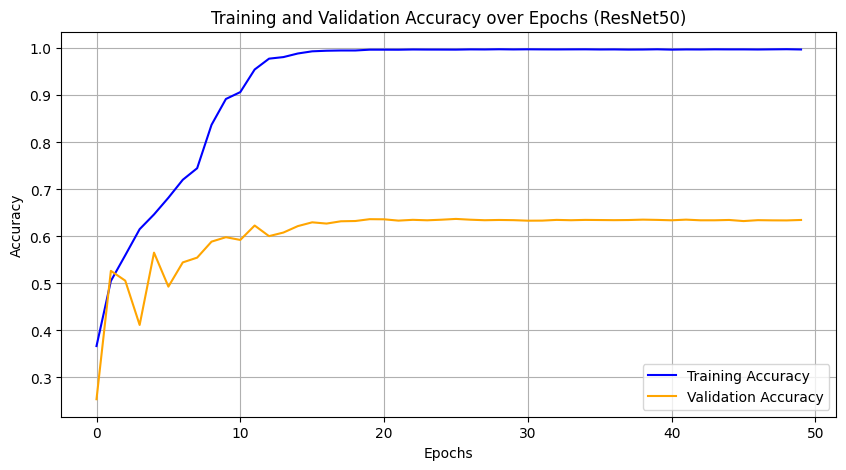

In [22]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy for ResNet50
plt.figure(figsize=(10, 5))
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy over Epochs (ResNet50)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [23]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report



# Step 1: Gather predictions from EfficientNetB0, InceptionResNetV2, and ResNet50
predictions_efficientnet_b0 = model.predict(X)  # Predictions from EfficientNetB0
predictions_inception_resnet = model_inception2.predict(X)  # Predictions from InceptionResNetV2
predictions_resnet50 = resnet_model_final.predict(X)  # Predictions from ResNet50

# Convert softmax probabilities into class predictions
predicted_classes_efficientnet_b0 = predictions_efficientnet_b0.argmax(axis=1)
predicted_classes_inception_resnet = predictions_inception_resnet.argmax(axis=1)
predicted_classes_resnet50 = predictions_resnet50.argmax(axis=1)

# Stack the outputs from all three models to use as input features for MLP
stacked_train_predictions = np.vstack((
    predicted_classes_efficientnet_b0,
    predicted_classes_inception_resnet,
    predicted_classes_resnet50
)).T

# Train an MLP model on the combined outputs
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(stacked_train_predictions, Y)  # Use the true labels (Y)

# Step 2: Make Predictions with all models on test data
# Predictions for EfficientNetB0
predictions_efficientnet_b0_test = model.predict(X2)
predicted_classes_efficientnet_b0_test = predictions_efficientnet_b0_test.argmax(axis=1)

# Predictions for InceptionResNetV2
predictions_inception_resnet_test = model_inception2.predict(X2)
predicted_classes_inception_resnet_test = predictions_inception_resnet_test.argmax(axis=1)

# Predictions for ResNet50
predictions_resnet50_test = resnet_model_final.predict(X2)
predicted_classes_resnet50_test = predictions_resnet50_test.argmax(axis=1)

# Stack the outputs for test data
stacked_test_predictions = np.vstack((
    predicted_classes_efficientnet_b0_test,
    predicted_classes_inception_resnet_test,
    predicted_classes_resnet50_test
)).T

# Step 3: Use the MLP model to make final predictions
predicted_classes_mlp = mlp_clf.predict(stacked_test_predictions)

# Step 4: Evaluate the Ensemble Model
print(classification_report(Y2, predicted_classes_mlp))


898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 49s 43ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       831
           1       0.55      0.48      0.52      1024
           2       0.61      0.58      0.59       958
           3       0.63      0.62      0.62      1233
           4       0.52      0.59      0.55      1247
           5       0.83      0.54      0.66       111
           6       0.83      0.88      0.86      1774

    accuracy                           0.67      7178
   macro avg       0.68      0.64      0.65      7178
weighted avg       0.67      0.67      0.67      7178

